In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve
import models.evaluate_models
from models.train_model import *
from models.evaluate_models import print_metrics
from preprocessing.preprocessing import *
import importlib
import models.train_model
import models.evaluate_models
import config_module.config
import config_module.config 
import preprocessing.preprocessing
importlib.reload(models.train_model) 
importlib.reload(models.evaluate_models) 
importlib.reload(preprocessing.preprocessing)
importlib.reload(config_module.config)

<module 'config_module.config' from 'c:\\Users\\Danny Phong\\Documents\\PROJECT\\WebVulnerabilities\\config_module\\config.py'>

In [2]:
def heatmap( model_name, y_test, y_test_pred):
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomalous'], yticklabels=['Hợp lệ', 'Độc hại'])
    plt.title(f'Confusion Matrix trên tập test ({model_name})')
    plt.xlabel('Prediction')
    plt.ylabel('Reality')
    plt.show()

In [3]:
def plot_roc_curve(y_test, y_pred, model_name, y_test_proba):
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve trên tập test ({model_name})')
    plt.legend()
    plt.show()

In [4]:

    
from sklearn.model_selection import train_test_split

import numpy as np
from config_module.config import CSIC_FILE, PARSE_REQUEST_TEST, PARSE_REQUEST_TRAIN, XTRAIN, YTRAIN, XVAL, YVAL, XTEST, YTEST
from data.raw_data import load

from config_module.config import RANDOM_STATE, TEST_SIZE_1, TEST_SIZE_2


data_raw = load(CSIC_FILE)
# data_raw_train = load(PARSE_REQUEST_TEST)
# data_raw1 = load(PARSE_REQUEST_TEST)
X_resampled, y_resampled = CSIC_preprocess(data_raw)
# X_resampled_1, y_resampled_1 = parsed_request_train_preprocess(data_raw_train)



# Train:Val:Test theo tỷ lệ 7:2:1
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=TEST_SIZE_1, random_state=RANDOM_STATE)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=TEST_SIZE_2, random_state=RANDOM_STATE)

# X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X_resampled_1, y_resampled_1, test_size=TEST_SIZE_1, random_state=RANDOM_STATE)
# X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=TEST_SIZE_2, random_state=RANDOM_STATE)


PFeature Distribution by Class:
                url_length  url_special_chars  url_malicious_keywords  \
classification                                                          
0                78.985944           8.930694                1.290833   
1               106.611769          13.273050                2.087133   

                url_params_count  content_length  content_special_chars  \
classification                                                            
0                       1.166667       23.458167               2.875139   
1                       2.233034       50.990824               7.418033   

                content_malicious_keywords  
classification                              
0                                 0.513056  
1                                 1.123399  
Feature Distribution was saved!
Feature matrix shape: 300


In [5]:
np.save( XTRAIN,X_train),
np.save( YTRAIN,y_train),
np.save( XVAL,X_val),
np.save( YVAL,y_val),
np.save( XTEST,X_test),
np.save( YTEST,y_test)

In [6]:
from config_module.config import XTRAIN, YTRAIN, XTEST, YTEST, XVAL, YVAL
from numpy import load
import numpy as np
X_train = np.load(XTRAIN)
y_train = np.load(YTRAIN)
X_test = np.load(XTEST)
y_test = np.load(YTEST)
X_val = np.load(XVAL)
y_val = np.load(YVAL)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Training time (s):198.32

Best hyperparameter : {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best recall on cross-validation: 0.9425020241813371
Prediction time (s):0.03
✅ Mô hình đã được lưu tại: Decision_tree_model.pkl

Validation on Tập val:
Accuracy: 0.9433
Test Error (1-Accuracy): 0.0567
Precision: 0.9465
Recall: 0.9407
F1-Score: 0.9436
ROC-AUC: 0.9450
Log Loss: 1.9750

Validation on Tập test:
Accuracy: 0.9377
Test Error (1-Accuracy): 0.0623
Precision: 0.9380
Recall: 0.9365
F1-Score: 0.9373
ROC-AUC: 0.9397
Log Loss: 2.1660
📊 Kết quả đã được lưu vào: model_results.csv

Validation on Validation Set:
Accuracy: 0.9433
Test Error (1-Accuracy): 0.0567
Precision: 0.9465
Recall: 0.9407
F1-Score: 0.9436
ROC-AUC: 0.9450
Log Loss: 1.9750

Validation on Test Set:
Accuracy: 0.9377
Test Error (1-Accuracy): 0.0623
Precision: 0.9380
Recall: 0.9365
F1-

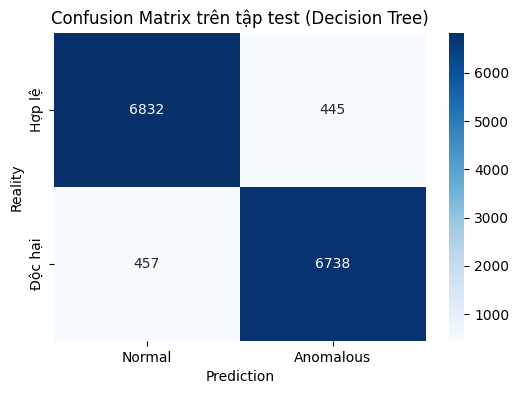

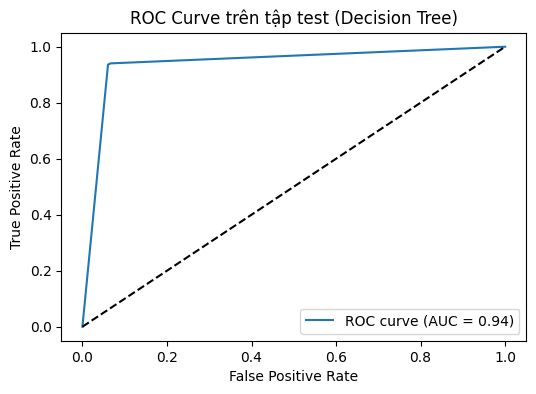

In [ ]:
def train_test_decision_tree():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = decision_tree(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("Decision Tree", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("Decision Tree", y_test, y_test_pred, y_test_proba, "Test Set")
    heatmap('Decision Tree', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'Decision Tree', y_test_proba)
    
    
    train_test_decision_tree()

In [8]:
def train_test_linear():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = linear_svc(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("LinearSVC", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("LinearSVC", y_test, y_test_pred, y_test_proba, "Test Set")
   
    heatmap('Linear SVC', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'Linear SVC', y_test_proba)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Training time (s):437.13

Best hyperparameter : {'estimator__C': 1, 'estimator__max_iter': 1000, 'estimator__tol': 0.001}
Best recall on cross-validation: 0.9479620502138932
Prediction time (s):0.17
✅ Mô hình đã được lưu tại: linearsvc.pkl

Validation on Tập val:
Accuracy: 0.9468
Test Error (1-Accuracy): 0.0532
Precision: 0.9618
Recall: 0.9315
F1-Score: 0.9464
ROC-AUC: 0.9882
Log Loss: 0.1326

Validation on Tập test:
Accuracy: 0.9478
Test Error (1-Accuracy): 0.0522
Precision: 0.9567
Recall: 0.9373
F1-Score: 0.9469
ROC-AUC: 0.9889
Log Loss: 0.1301
📊 Kết quả đã được lưu vào: model_results.csv

Validation on Validation Set:
Accuracy: 0.9468
Test Error (1-Accuracy): 0.0532
Precision: 0.9618
Recall: 0.9315
F1-Score: 0.9464
ROC-AUC: 0.9882
Log Loss: 0.1326

Validation on Test Set:
Accuracy: 0.9478
Test Error (1-Accuracy): 0.0522
Precision: 0.9567
Recall: 0.9373
F1-Score: 0.9469
ROC-AUC: 0.9889
Log Loss: 0.1301


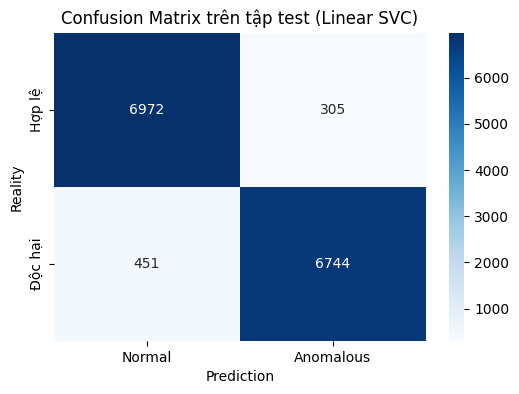

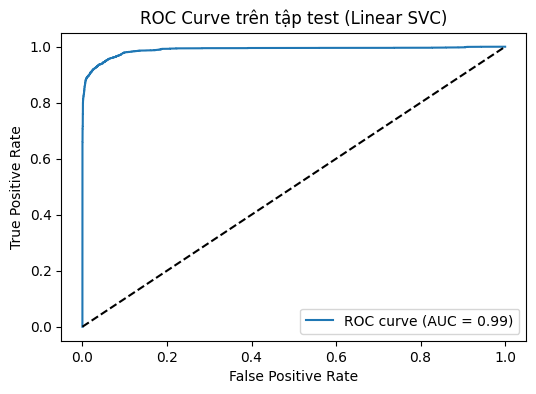

In [9]:
train_test_linear()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Training time (s):639.57

Best hyperparameter : {'algorithm': 'kd_tree', 'leaf_size': 20, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best recall on cross-validation: 0.9524165809772555
Prediction time (s):210.66
✅ Mô hình đã được lưu tại: knn.pkl

Validation on Tập val:
Accuracy: 0.9576
Test Error (1-Accuracy): 0.0424
Precision: 0.9567
Recall: 0.9593
F1-Score: 0.9580
ROC-AUC: 0.9835
Log Loss: 0.5335

Validation on Tập test:
Accuracy: 0.9554
Test Error (1-Accuracy): 0.0446
Precision: 0.9458
Recall: 0.9657
F1-Score: 0.9556
ROC-AUC: 0.9834
Log Loss: 0.5379
📊 Kết quả đã được lưu vào: model_results.csv

Validation on Validation Set:
Accuracy: 0.9576
Test Error (1-Accuracy): 0.0424
Precision: 0.9567
Recall: 0.9593
F1-Score: 0.9580
ROC-AUC: 0.9835
Log Loss: 0.5335

Validation on Test Set:
Accuracy: 0.9554
Test Error (1-Accuracy): 0.0446
Precision: 0.9458
Recall: 0.9657
F1-Score: 0.9556
ROC-AUC: 0.9834
Log Loss: 0.5379


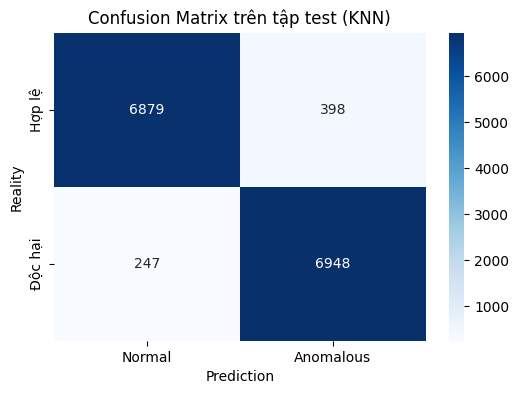

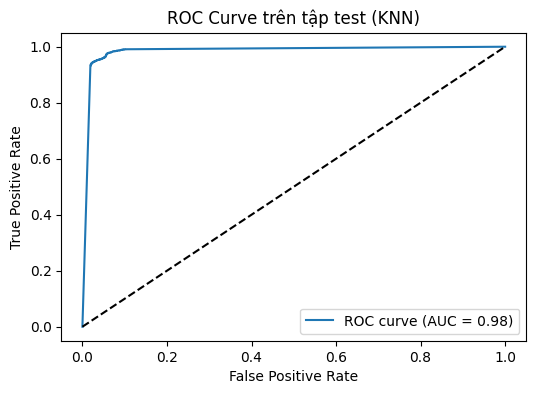

In [10]:

def train_test_knn():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = knn(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("KNN", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("KNN", y_test, y_test_pred, y_test_proba, "Test Set")
    heatmap('KNN', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'KNN', y_test_proba)

train_test_knn()

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Training time (s):3.30

Best hyperparameter : {'var_smoothing': 1e-05}
Best recall on cross-validation: 0.7954404973979367
Prediction time (s):0.19
✅ Mô hình đã được lưu tại: naive_bayes_model.pkl

Validation on Tập val:
Accuracy: 0.8089
Test Error (1-Accuracy): 0.1911
Precision: 0.8564
Recall: 0.7458
F1-Score: 0.7973
ROC-AUC: 0.9097
Log Loss: 6.6538

Validation on Tập test:
Accuracy: 0.8043
Test Error (1-Accuracy): 0.1957
Precision: 0.8448
Recall: 0.7429
F1-Score: 0.7906
ROC-AUC: 0.9043
Log Loss: 6.7715
📊 Kết quả đã được lưu vào: model_results.csv

Validation on Validation Set:
Accuracy: 0.8089
Test Error (1-Accuracy): 0.1911
Precision: 0.8564
Recall: 0.7458
F1-Score: 0.7973
ROC-AUC: 0.9097
Log Loss: 6.6538

Validation on Test Set:
Accuracy: 0.8043
Test Error (1-Accuracy): 0.1957
Precision: 0.8448
Recall: 0.7429
F1-Score: 0.7906
ROC-AUC: 0.9043
Log Loss: 6.7715


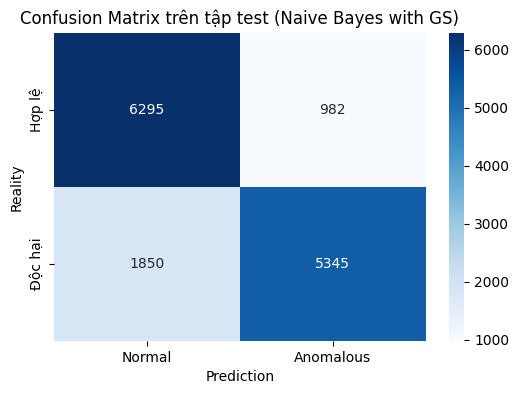

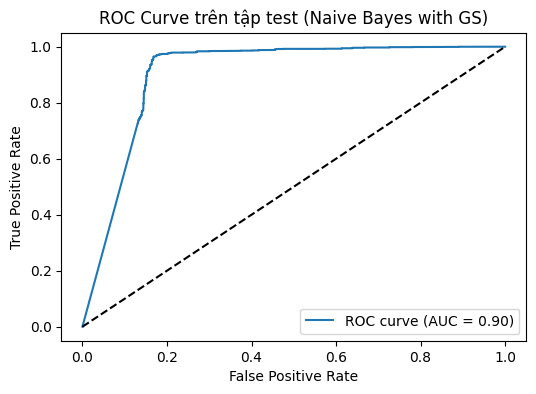

In [11]:

def train_test_naive_bayes():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = naive_bayes_opt_gs(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("Naive Bayes", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("Naive Bayes", y_test, y_test_pred, y_test_proba, "Test Set")
    heatmap('Naive Bayes with GS', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'Naive Bayes with GS', y_test_proba)
train_test_naive_bayes()

CSIC dataset
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Tranining time (s): 130.40

Best hyperparameter : {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best recall on cross-validation: 0.992543766634077
Prediction time (s): 0.23
✅ Mô hình đã được lưu tại: random_forest_grids.pkl

Validation on Tập val:
Accuracy: 0.9449
Test Error (1-Accuracy): 0.0551
Precision: 0.9085
Recall: 0.9903
F1-Score: 0.9476
ROC-AUC: 0.9948
Log Loss: 0.1199

Validation on Tập test:
Accuracy: 0.9389
Test Error (1-Accuracy): 0.0611
Precision: 0.8966
Recall: 0.9915
F1-Score: 0.9417
ROC-AUC: 0.9940
Log Loss: 0.1251
📊 Kết quả đã được lưu vào: model_results.csv

Validation on Validation Set:
Accuracy: 0.9449
Test Error (1-Accuracy): 0.0551
Precision: 0.9085
Recall: 0.9903
F1-Score: 0.9476
ROC-AUC: 0.9948
Log Loss: 0.1199

Validation on Test Set:
Accuracy: 0.9389
Test Error (1-Accuracy): 0.0611
Precision: 0.8966
Recall: 0.9915
F1-Score: 0.9417
ROC-AUC: 0.9940
Log Loss: 0.1251


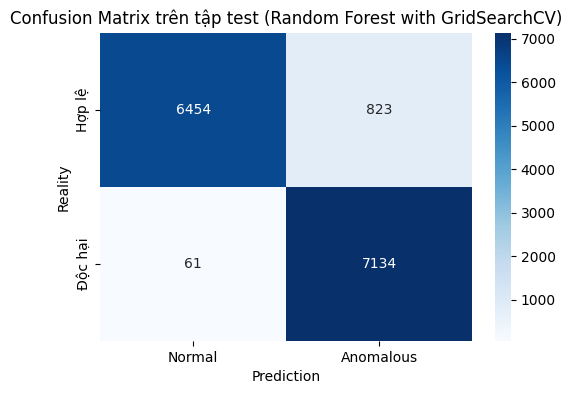

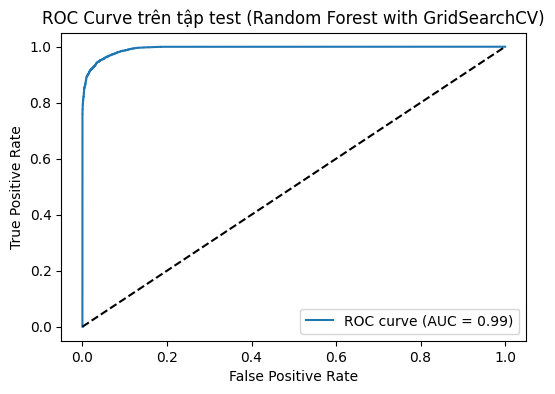

In [12]:
def train_test_rf():
    print("CSIC dataset")
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = random_forest_grid_search(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("Random Forest", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("Random Forest", y_test, y_test_pred, y_test_proba, "Test Set")
    # print("ECML dataset")
    # y_test_pred_1, y_test_proba_1, y_val_pred_1, y_val_proba_1, best_model = random_forest_grid_search(X_train_1, y_train_1, X_test_1, X_val_1)
    # print_metrics("Random Forest", y_val_1, y_val_pred_1, y_val_proba_1, "Validation Set")
    # print_metrics("Random Forest", y_test_1, y_test_pred_1, y_test_proba_1, "Test Set")
    heatmap('Random Forest with GridSearchCV', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'Random Forest with GridSearchCV', y_test_proba)
train_test_rf()

Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\Danny Phong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
17 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Danny Phong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Danny Phong\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\Danny Phong\AppData\Local\Programs\Python\Py

Training time (s):128.52

Best hyperparameter : {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best recall on cross-validation: 0.9644738971742127
Prediction time (s):0.22
✅ Mô hình đã được lưu tại: xgboost.pkl

Validation on Tập val:
Accuracy: 0.9684
Test Error (1-Accuracy): 0.0316
Precision: 0.9596
Recall: 0.9786
F1-Score: 0.9690
ROC-AUC: 0.9971
Log Loss: 0.0699

Validation on Tập test:
Accuracy: 0.9612
Test Error (1-Accuracy): 0.0388
Precision: 0.9493
Recall: 0.9740
F1-Score: 0.9615
ROC-AUC: 0.9964
Log Loss: 0.0770
📊 Kết quả đã được lưu vào: model_results.csv

Validation on Validation Set:
Accuracy: 0.9684
Test Error (1-Accuracy): 0.0316
Precision: 0.9596
Recall: 0.9786
F1-Score: 0.9690
ROC-AUC: 0.9971
Log Loss: 0.0699

Validation on Test Set:
Accuracy: 0.9612
Test Error (1-Accuracy): 0.0388
Precision: 0.9493
Recall: 0.9740
F1-Score: 0.9615
ROC-AUC: 0.9964
Log Loss: 0.0770


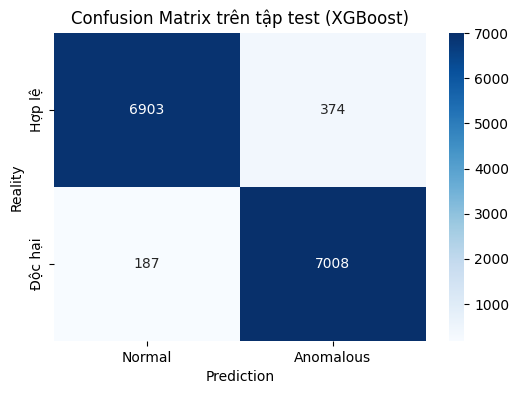

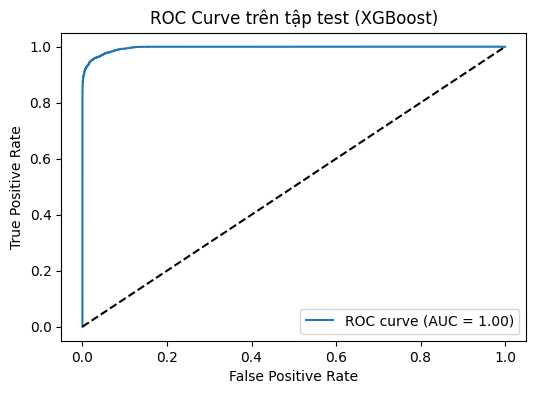

In [13]:
def train_test_xgboost():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = xgboost(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("XGboot", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("XGboot", y_test, y_test_pred, y_test_proba, "Test Set")   
    heatmap('XGBoost', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'XGBoost', y_test_proba)
train_test_xgboost()

   Train Type   Dataset  Accuracy  Test Error  Precision    Recall  F1-Score  \
0          ML   Tập val  0.943322    0.056678   0.946484  0.940685  0.943575   
1          ML  Tập test  0.937673    0.062327   0.938048  0.936484  0.937265   
2          ML   Tập val  0.946829    0.053171   0.961760  0.931495  0.946386   
3          ML  Tập test  0.947761    0.052239   0.956731  0.937318  0.946925   
4          ML   Tập val  0.957632    0.042368   0.956679  0.959343  0.958009   
5          ML  Tập test  0.955431    0.044569   0.945821  0.965671  0.955643   
6          ML   Tập val  0.808923    0.191077   0.856412  0.745753  0.797261   
7          ML  Tập test  0.804312    0.195688   0.844792  0.742877  0.790564   
8          ML   Tập val  0.944865    0.055135   0.908533  0.990253  0.947635   
9          ML  Tập test  0.938917    0.061083   0.896569  0.991522  0.941658   
10         ML   Tập val  0.968434    0.031566   0.959585  0.978558  0.968978   
11         ML  Tập test  0.961235    0.0

C:\Users\Danny Phong\AppData\Local\Temp\ipykernel_31240\397119161.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df[results_df['Dataset'] == 'Tập test'], x='Model', y='Recall', palette='Set2')


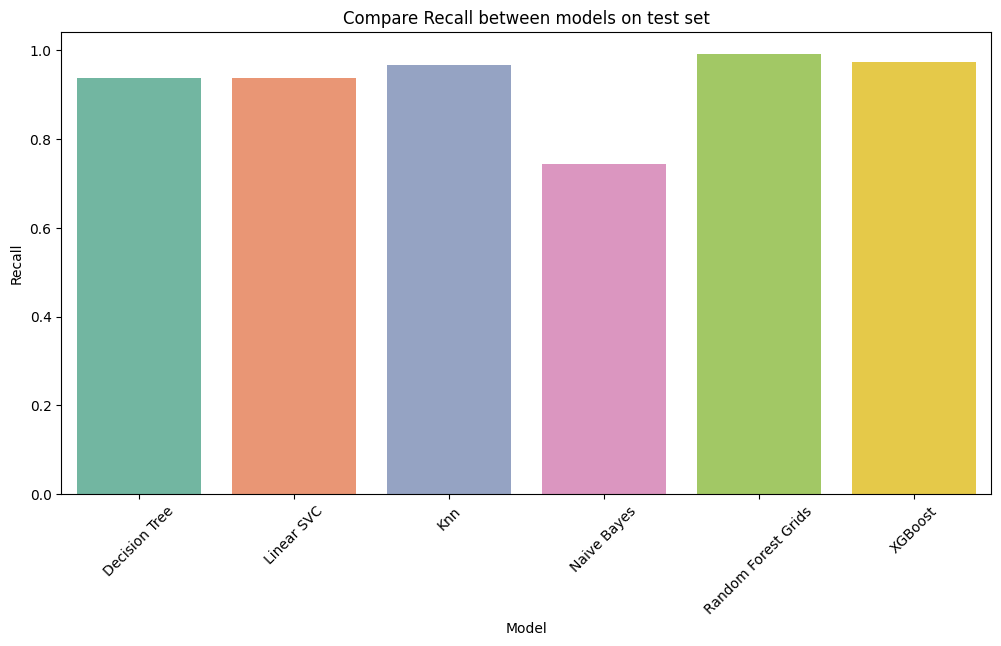

In [14]:
results_df = pd.read_csv('model_results.csv')
print(results_df)
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df[results_df['Dataset'] == 'Tập test'], x='Model', y='Recall', palette='Set2')
plt.title('Compare Recall between models on test set')
plt.xticks(rotation=45)
plt.show()

C:\Users\Danny Phong\AppData\Local\Temp\ipykernel_31240\116253463.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df[results_df['Dataset'] == 'Tập test'], x='Model', y='F1-Score', palette='Set2')


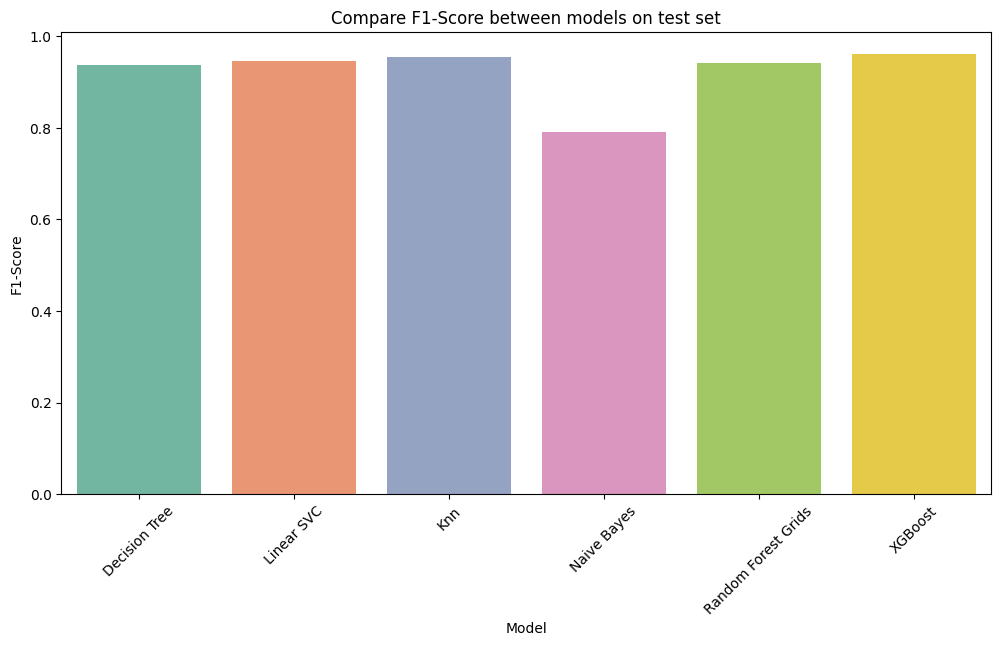

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df[results_df['Dataset'] == 'Tập test'], x='Model', y='F1-Score', palette='Set2')
plt.title('Compare F1-Score between models on test set')
plt.xticks(rotation=45)
plt.show()

In [16]:
# All values
test_df = results_df[results_df['Dataset'] == 'Tập test'][[
    'Model', 'Accuracy', 'Test Error', 'Precision', 'Recall',
    'F1-Score', 'ROC-AUC', 'Log Loss', 'Training Time', 'Prediction Time'
]]

# Table
print("\n Compare all values:")
display(test_df) 


 Compare all values:


,Model,Accuracy,Test Error,Precision,Recall,F1-Score,ROC-AUC,Log Loss,Training Time,Prediction Time
1,Decision Tree,0.937673,0.062327,0.938048,0.936484,0.937265,0.939659,2.166000,198.324807,0.033549
3,Linear SVC,0.947761,0.052239,0.956731,0.937318,0.946925,0.988898,0.130123,437.134894,0.165990
5,Knn,0.955431,0.044569,0.945821,0.965671,0.955643,0.983448,0.537912,639.567592,210.656025
7,Naive Bayes,0.804312,0.195688,0.844792,0.742877,0.790564,0.904309,6.771515,3.297119,0.189221
9,Random Forest Grids,0.938917,0.061083,0.896569,0.991522,0.941658,0.994008,0.125075,130.400540,0.227757
11,XGBoost,0.961235,0.038765,0.949336,0.974010,0.961515,0.996436,0.076961,128.515789,0.224172


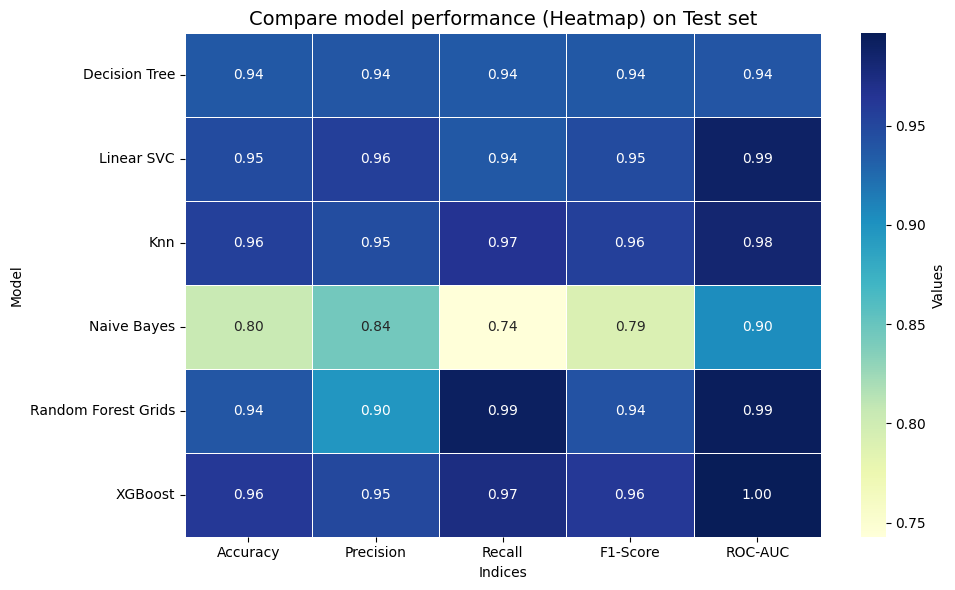

In [17]:
results_df = pd.read_csv('model_results.csv')

# Test set filter
test_df = results_df[results_df['Dataset'] == 'Tập test']

# Select indices
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
heatmap_data = test_df.set_index('Model')[metrics]

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Values'}, linewidths=0.5)

plt.title('Compare model performance (Heatmap) on Test set', fontsize=14)
plt.xlabel('Indices')
plt.ylabel('Model')
plt.tight_layout()

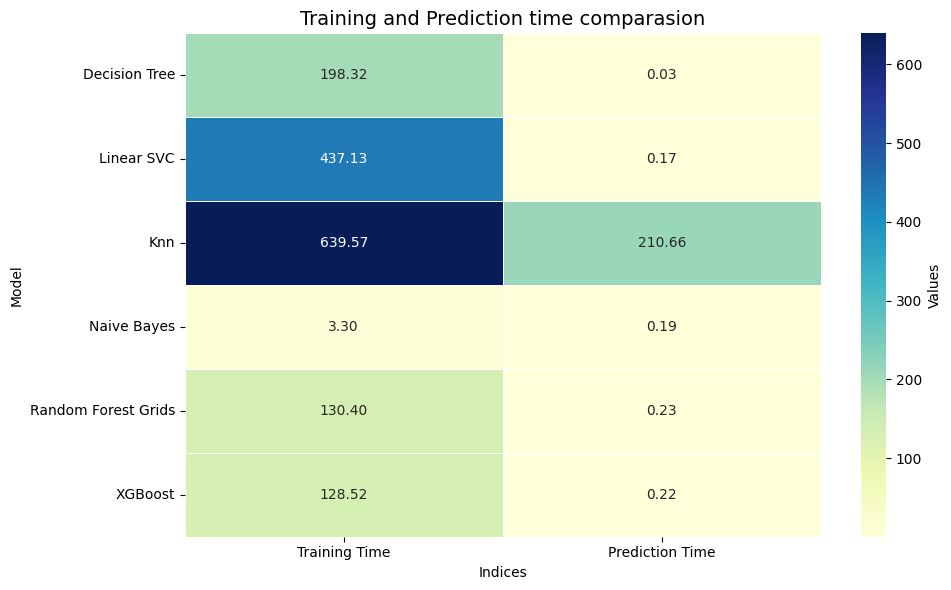

In [18]:
results_df = pd.read_csv('model_results.csv')

# Test set filter
test_df = results_df[results_df['Dataset'] == 'Tập test']

# Select indices
metrics = ['Training Time', 'Prediction Time']
heatmap_data = test_df.set_index('Model')[metrics]


plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Values'}, linewidths=0.5)

plt.title('Training and Prediction time comparasion', fontsize=14)
plt.xlabel('Indices')
plt.ylabel('Model')
plt.tight_layout()

In [19]:
import shutil
import os

def delete_pycache(start_path='.'):
    for root, dirs, files in os.walk(start_path):
        for d in dirs:
            if d == '__pycache__':
                full_path = os.path.join(root, d)
                try:
                    shutil.rmtree(full_path)
                    print(f"Deleted: {full_path}")
                except Exception as e:
                    print(f"Error deleting {full_path}: {e}")

# Gọi hàm
delete_pycache()

Deleted: .\config_module\__pycache__
Deleted: .\data\__pycache__
Deleted: .\models\__pycache__
Deleted: .\preprocessing\__pycache__
